In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
# sys.setdefaultencoding() does not exist, here!
reload(sys)  # Reload does the trick!
sys.setdefaultencoding('UTF8')

%matplotlib inline

In [2]:
#cargo los archivos csv
p_educacion = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
#cargo los archivos csv
p_genero_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
#cargo los archivos csv
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [5]:
#cargo los archivos csv
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
#cargo los archivos csv
avisos_online = pd.read_csv('../data/fiuba_5_avisos_online.csv')
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [7]:
#cargo los csv
avisos_detalle = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# FINGER 1

# Postulaciones x Dia de Semana

In [8]:
#Cambio la fecha a datetime
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])

In [9]:
postulaciones['dia_semana'] = postulaciones['fechapostulacion'].dt.weekday

In [10]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,0
1,1111920714,NM5M,2018-02-06 09:04:50,1
2,1112346945,NM5M,2018-02-22 09:04:47,3
3,1112345547,NM5M,2018-02-22 09:04:59,3
4,1112237522,5awk,2018-01-25 18:55:03,3


In [11]:
postulaciones['dia_semana'].value_counts().sort_index()

0    668310
1    658428
2    677836
3    506163
4    446698
5    217331
6    226857
Name: dia_semana, dtype: int64

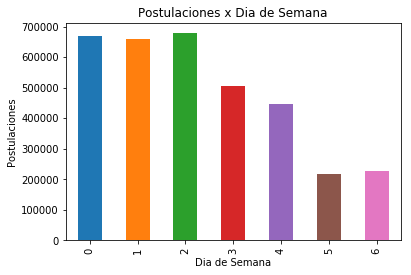

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
postulaciones['dia_semana'].value_counts().sort_index().plot(kind='bar')
plt.show()

# Postulaciones x Dia del Mes

In [13]:
#Postulaciones enero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] < '02-01-2018']

In [14]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,0
4,1112237522,5awk,2018-01-25 18:55:03,3
5,1112277633,5awk,2018-01-29 13:34:44,0
20,1112286523,ZaO5,2018-01-24 15:07:39,2
21,1112272060,ZaO5,2018-01-24 15:20:10,2


In [15]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


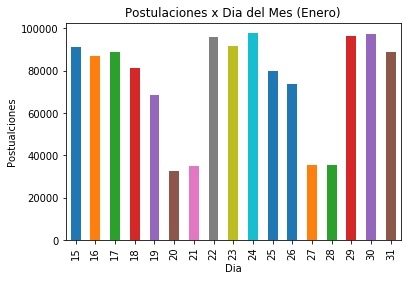

In [16]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Enero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postualciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

In [17]:
#Postulaciones febrero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] >= '02-01-2018']

In [18]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
1,1111920714,NM5M,2018-02-06 09:04:50,1
2,1112346945,NM5M,2018-02-22 09:04:47,3
3,1112345547,NM5M,2018-02-22 09:04:59,3
6,1112302347,5awk,2018-02-07 20:49:22,2
7,1112291495,5awk,2018-02-07 20:50:13,2


In [19]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


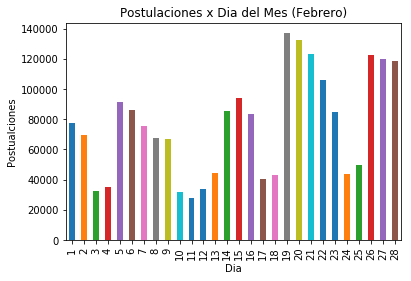

In [20]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Febrero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postualciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

# Top 5 - Postulaciones x Area de trabajo

In [21]:
df = pd.merge(postulaciones, avisos_detalle, on='idaviso', how='inner')

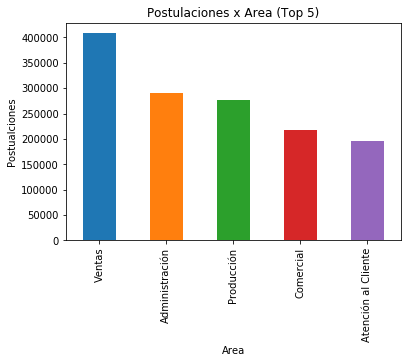

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Area (Top 5)')
ax.set_xlabel('Area')
ax.set_ylabel('Postualciones')
df['nombre_area'].value_counts().head().plot(kind='bar')

plt.show()

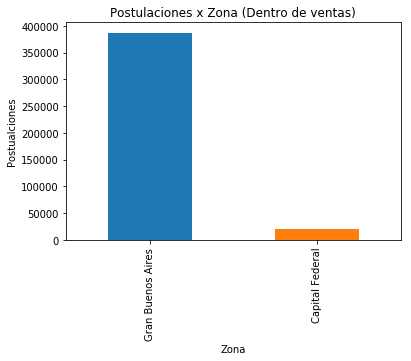

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Zona (Dentro de ventas)')
ax.set_xlabel('Zona')
ax.set_ylabel('Postualciones')
df[df['nombre_area'] == 'Ventas']['nombre_zona'].value_counts().plot(kind='bar')
plt.show()

# FINGER 2

# Tasa de conversion de avisos (postulaciones / visitas)

In [24]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,0
1,1111920714,NM5M,2018-02-06 09:04:50,1
2,1112346945,NM5M,2018-02-22 09:04:47,3
3,1112345547,NM5M,2018-02-22 09:04:59,3
4,1112237522,5awk,2018-01-25 18:55:03,3


In [25]:
postulaciones['fechapostulacion'] = postulaciones['fechapostulacion'].dt.date

In [26]:
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])

In [27]:
visitas['timestamp'] = visitas['timestamp'].dt.date

In [28]:
postulaciones_validas = postulaciones[postulaciones['fechapostulacion'].isin(visitas['timestamp'])]

In [29]:
visitas_validas = visitas[visitas['timestamp'].isin(postulaciones_validas['fechapostulacion'])]

In [30]:
visitas_validas['timestamp'].value_counts()

2018-02-27    232145
2018-02-26    227957
2018-02-28    227160
2018-02-24     95930
2018-02-25     90646
2018-02-23     47236
Name: timestamp, dtype: int64

In [31]:
postulaciones_validas['fechapostulacion'].value_counts()

2018-02-26    122688
2018-02-27    119845
2018-02-28    118296
2018-02-23     85024
2018-02-25     49924
2018-02-24     43718
Name: fechapostulacion, dtype: int64

In [32]:
postulaciones_validas = postulaciones_validas.rename(columns={'fechapostulacion':'fecha'})
postulaciones_validas.head()

,idaviso,idpostulante,fecha,dia_semana
12,1112315188,5awk,2018-02-28,2
13,1112346738,5awk,2018-02-28,2
14,1112330625,5awk,2018-02-28,2
15,1112306543,5awk,2018-02-28,2
16,1112315170,5awk,2018-02-28,2


In [33]:
visitas_validas = visitas_validas.rename(columns={'idAviso':'idaviso','timestamp':'fecha'})
visitas_validas.head()

,idaviso,fecha,idpostulante
0,1111780242,2018-02-23,YjVJQ6Z
1,1112263876,2018-02-23,BmVpYoR
2,1112327963,2018-02-23,wVkBzZd
3,1112318643,2018-02-23,OqmP9pv
4,1111903673,2018-02-23,DrpbXDP


In [34]:
vg = visitas_validas.groupby('idaviso').agg({'idpostulante':'count'})

In [35]:
pg = postulaciones_validas.groupby('idaviso').agg({'idpostulante':'count'})

In [36]:
pg = pg.reset_index()
vg = vg.reset_index()
tasa_convergencia = pd.merge(vg,pg,on='idaviso')

In [37]:
tasa_convergencia.head()

,idaviso,idpostulante_x,idpostulante_y
0,12543760,378,127
1,12812680,87,46
2,1000365835,29,14
3,1000375329,468,310
4,1000502125,18,8


In [38]:
tasa_media = tasa_convergencia['idpostulante_x'].sum() / tasa_convergencia['idpostulante_x'].count()

In [39]:
tasa_convergencia[tasa_convergencia['idpostulante_x'] > tasa_media].head()

,idaviso,idpostulante_x,idpostulante_y
0,12543760,378,127
3,1000375329,468,310
9,1000905002,523,251
18,1001442844,404,93
20,1002088629,417,171


In [40]:
tasa_convergencia['tasa'] = (tasa_convergencia['idpostulante_x'] / tasa_convergencia['idpostulante_y'])

In [41]:
top5_tasa_convergencia = tasa_convergencia.set_index('idaviso')['tasa'].sort_values(ascending=False).head()

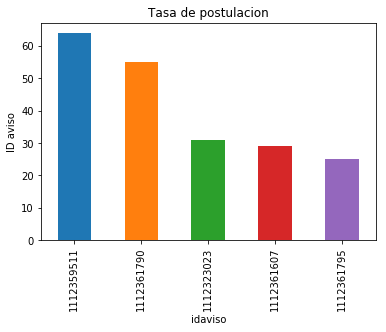

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Tasa de postulacion')
ax.set_xlabel('Tasa')
ax.set_ylabel('ID aviso')
top5_tasa_convergencia.plot(kind='bar')
plt.show()

# Distribucion de edad de los postulantes

In [43]:
# Borro datos invalidos
p_genero_edad = p_genero_edad[(p_genero_edad['fechanacimiento'].str.startswith('19')) \
                              | (p_genero_edad['fechanacimiento'].str.startswith('20'))]

In [44]:
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [45]:
p_genero_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_genero_edad['fechanacimiento']).dt.year

In [46]:
p_genero_edad = p_genero_edad[(p_genero_edad['edad'] <= 65) & (p_genero_edad['edad'] >= 18)]

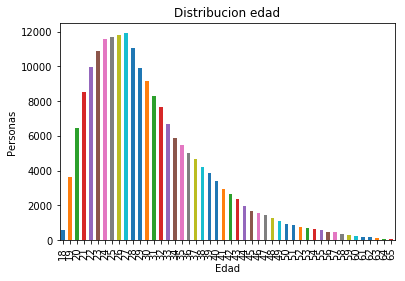

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Personas')
p_genero_edad['edad'].value_counts().sort_index().plot(kind='bar')
plt.show()

# Nivel de visitas por dia

In [108]:
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23,YjVJQ6Z
1,1112263876,2018-02-23,BmVpYoR
2,1112327963,2018-02-23,wVkBzZd
3,1112318643,2018-02-23,OqmP9pv
4,1111903673,2018-02-23,DrpbXDP


In [109]:
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [110]:
heap = p_educacion.pivot_table(index='nombre',columns='estado',values='idpostulante',aggfunc='count')

In [111]:
heap

estado,Abandonado,En Curso,Graduado
nombre,,,
Doctorado,15,94,105
Master,144,1519,1935
Otro,947,4919,18882
Posgrado,317,2239,4831
Secundario,3156,3995,103105
Terciario/Técnico,5692,15032,27009
Universitario,14955,50733,38607


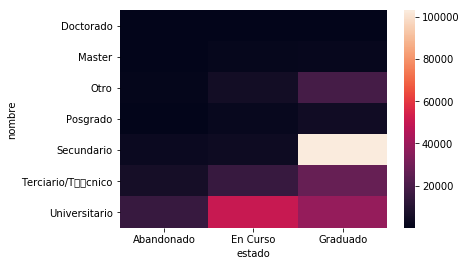

In [112]:
g = sns.heatmap(heap)

In [113]:
p_educacion.shape

(298231, 3)

In [114]:
visitas.shape

(961897, 3)

In [115]:
df_merge = pd.merge(p_educacion,visitas,on='idpostulante')

In [116]:
df_merge.shape

(1446315, 5)

In [117]:
df_merge.head()

,idpostulante,nombre,estado,idAviso,timestamp
0,NdJl,Posgrado,En Curso,1112352879,2018-02-26
1,NdJl,Posgrado,En Curso,1112359422,2018-02-28
2,NdJl,Posgrado,En Curso,1112359422,2018-02-28
3,NdJl,Posgrado,En Curso,1112364750,2018-02-28
4,NdJl,Posgrado,En Curso,1112364750,2018-02-28


In [118]:
heap = df_merge.pivot_table(index='nombre',columns='estado',values='idpostulante',aggfunc='count')

In [119]:
heap

estado,Abandonado,En Curso,Graduado
nombre,,,
Doctorado,49,387,569
Master,721,5886,7616
Otro,3686,21738,79828
Posgrado,1704,9096,21191
Secundario,11334,16008,496379
Terciario/Técnico,28081,73381,129283
Universitario,78368,277127,183883


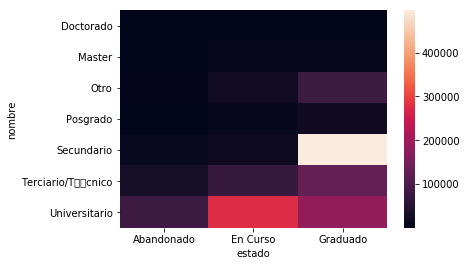

In [120]:
g = sns.heatmap(heap)